# Homework 7

This assignment uses the weather data from Lab 1, from [https://github.com/fivethirtyeight/data/tree/master/us-weather-history](https://github.com/fivethirtyeight/data/tree/master/us-weather-history).  We used KNYC.csv in Lab 1, and will also use KCLT.csv in this homework, which is the weather data for Charlotte, NC, in this assignment.

The URLs for the two CSV files are:
KNYC.csv: [https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv)
KCLT.csv: [https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv)

This assignment will look at different ways to predict the actual minimum daily temperature in New York using linear regression.  The actual minimum temperature was the mimimum temperature recorded on that day.

### Question 0:  Loading the data

Import libraries and load the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
kclt = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv")
knyc = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv")

*Questions 1 and 2 will look at predicting the NYC actual min temperature from the NYC average min temperature*

## Question 1: Exploratory data analysis (simple linear regression)
   
a) Use regplot from Seaborn to create a scatter plot of the average min temperature (on x axis) vs. the actual min temperature (on y axis) with the regression line.

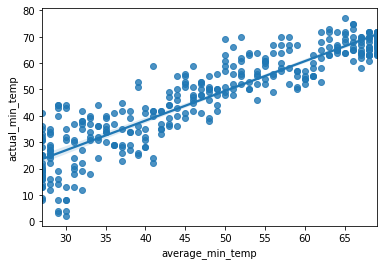

In [5]:
q1 = sns.regplot(x="average_min_temp", y="actual_min_temp", data=knyc)

1b) Do you think this data has a linear relationship?

<b>Answer 1b:</b>  Yes. Though not a strong one, there is definetly a positive linear correlation.

## Question 2: Simple linear regression model

a) Compute the linear regression model where the independent variable is the average min temperature and the dependent variable is the actual min temperature.

In [6]:
knyc.head(1)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.0,0.12,2.17


In [7]:
q2_lm = smf.ols("actual_min_temp ~ average_min_temp", data = knyc).fit()
q2_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_min_temp   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1750.
Date:                Sun, 27 Feb 2022   Prob (F-statistic):          6.49e-141
Time:                        16:11:04   Log-Likelihood:                -1256.5
No. Observations:                 365   AIC:                             2517.
Df Residuals:                     363   BIC:                             2525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.9039      1.354     -5.099      0.000      -9.566      -4.241
average_min_temp     1.1277      0.027     41.834      0.000       1.075       1.181
==============================================================================
Omnibus:                        3.338   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                3.516
Skew:                          -0.102   Prob(JB):                        0.172
Kurtosis:                       3.435   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2b) What is the equation for the linear model?  What proportion of the variance is explained by the model?

<b>Answer 2b:</b> The equation for this linear model is: $Y = -6.9039 + 1.1277 X_1$. The $R^2$ value for this model is $0.828$, which is indicative of a moderately-strong positive linear correlation.


2c) Plot a histogram of the residuals of your model from part 2a.  

<AxesSubplot:>

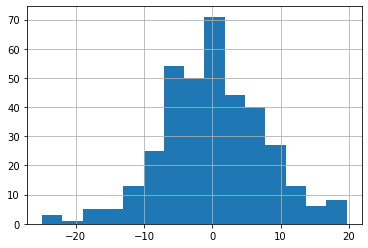

In [8]:
q2_lm.resid.hist(bins=15)

2d) Describe the distribution of the residuals.  Based on this distribution and everything else you know about the data and model from your answers to Questions 1 and 2, do you think this linear model is a good fit?  Why or why not?

<b>Answer 2d:</b> The residuals are normally distributed and are centered at 0. For this reason, this model is a good fit.

*Questions 3, 4, and 5 look at predicting the NYC actual min temperature from the Charlotte actual min temperature and the NYC average min temperature*

## Question 3: Exploratory data analysis (multi-linear regression)

Note:  To easily perform the following analysis, add the column of actual min temperatures from the Charlotte weather data to your NYC weather dataframe.  
    ex.  `nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_min_temp"]`

a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual min temperature (on x axis) vs. the NYC actual min temperature (on y axis) with the regression line.

In [9]:
knyc["kclt_actual_min_temp"] = kclt["actual_min_temp"]

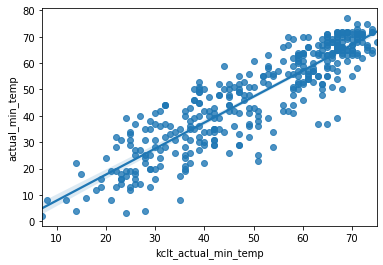

In [10]:
q1 = sns.regplot(x="kclt_actual_min_temp", y="actual_min_temp", data=knyc)

3b) Do you think this data has a linear relationship?

<b>Answer 3b:</b> Yes. It appears that there is a linear relationship here that, though not strong, is prevalent.

## Question 4:  Multi-linear regression model

a) Compute the linear regression model where the independent variables are the NYC average min temperature and Charlotte actual min temperature, and the dependent variable is the NYC actual min temperature.

In [11]:
knyc.head(1)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,kclt_actual_min_temp
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.0,0.12,2.17,70


In [12]:
q4_lm = smf.ols("actual_min_temp ~ average_min_temp + kclt_actual_min_temp", data = knyc).fit()
q4_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_min_temp   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1242.
Date:                Sun, 27 Feb 2022   Prob (F-statistic):          8.12e-163
Time:                        16:18:27   Log-Likelihood:                -1201.7
No. Observations:                 365   AIC:                             2409.
Df Residuals:                     362   BIC:                             2421.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -8.3927      1.174     -7.148      0.000     -10.702      -6.084
average_min_temp         0.6731      0.047     14.454      0.000       0.582       0.765
kclt_actual_min_temp     0.4668      0.041     11.265      0.000       0.385       0.548
==============================================================================
Omnibus:                        1.201   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                0.974
Skew:                          -0.041   Prob(JB):                        0.615
Kurtosis:                       3.239   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4b) What proportion of the variance is explained by the model?

<b>Answer 4b:</b> The $R^2$ value for this model is $0.872$. This denotes a strong positive linear correlation between the inputs and the response variable.

4c) Predict the NYC actual min temperature if the Charlotte min temperature is 45F and the NYC average min temperature is 32F.

In [13]:
test_weather_df = pd.DataFrame({"average_min_temp":[32], "kclt_actual_min_temp":[45]})
q4_lm.predict(test_weather_df)

0    34.151336
dtype: float64

## Question 5: Evaluating the multi-linear regression model

a) Plot a histogram of the residuals of your model from Question 4.

<AxesSubplot:>

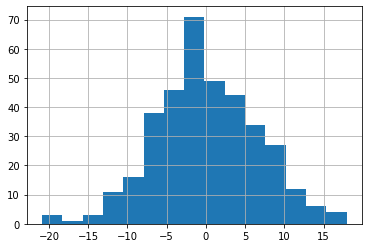

In [14]:
q4_lm.resid.hist(bins=15)

5b) Describe the distribution of the residuals.

<b>Answer 5b:</b> Though the residuals are distributed normally, they are not centered at 0. 

5c) Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model.  If you are using `plt.scatter()` you can add a horizontal line to your plot at 0 with the code `plt.axhline(0)`.

Text(0, 0.5, 'Residuals')

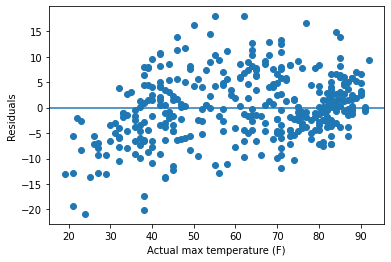

In [17]:
plt.scatter(x = knyc["actual_max_temp"], y = q4_lm.resid)
plt.axhline(0)
plt.xlabel("Actual max temperature (F)")
plt.ylabel("Residuals")

5d) What do you notice about how the residuals are distributed above and below this line?  What tempertures will be overestimated by this model?  What temperatures will be underestimated by this model?

<b>Answer 5d:</b> The range of predicitons for this model varies greatly, to the point where at any temperature there is a good chance that the model will either under- or over-estimate the actual output.

5e) Based on your answers to Questions 3, 4, and 5, do you think this linear model is a good fit?

<b>Answer 5e:</b> No, this model is not a good fit.